In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
from datetime import datetime, timezone
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')


from numpy import ones,vstack
from numpy.linalg import lstsq

# List of Colors

In [2]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']
color_list4 = ["#FF1F5B", "#00CD6C", "#009ADE", "#AF58BA", "#FFC61E", "#F28522", "#A0B1BA", "#A6761D", "#E9002D", "#FFAA00", "#00B000"]

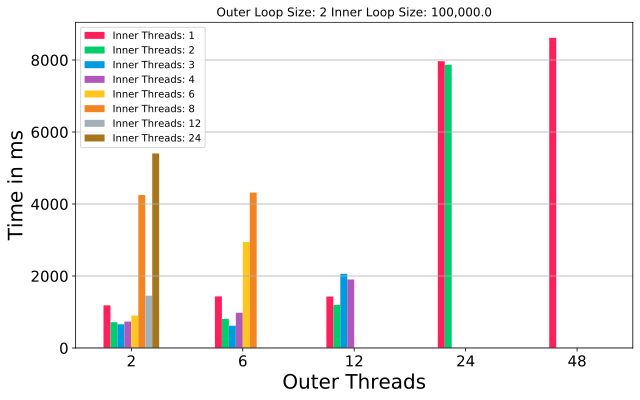

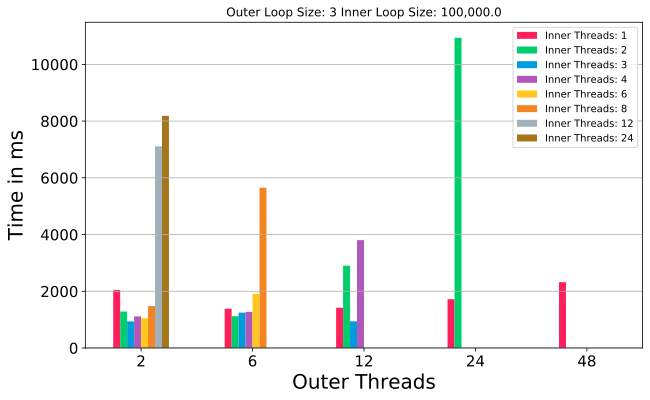

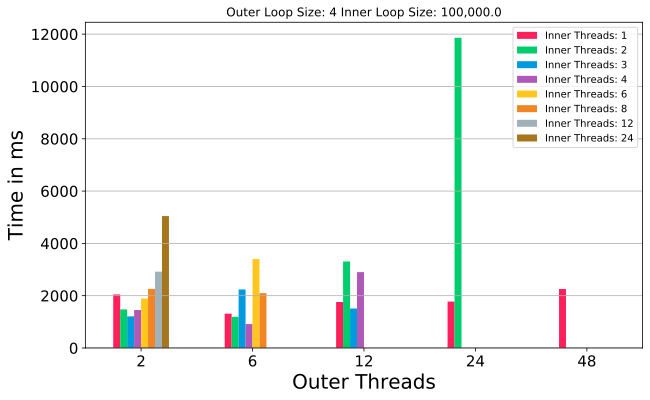

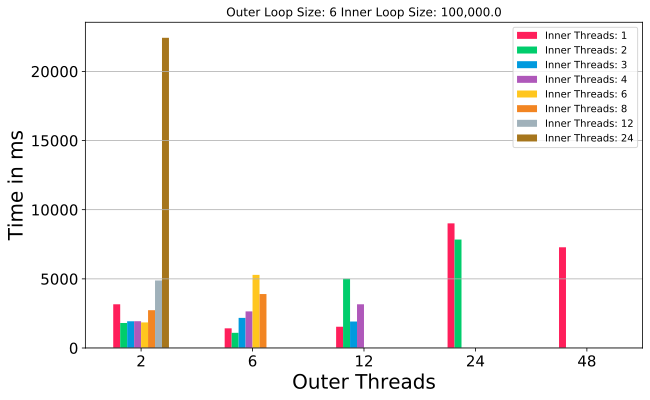

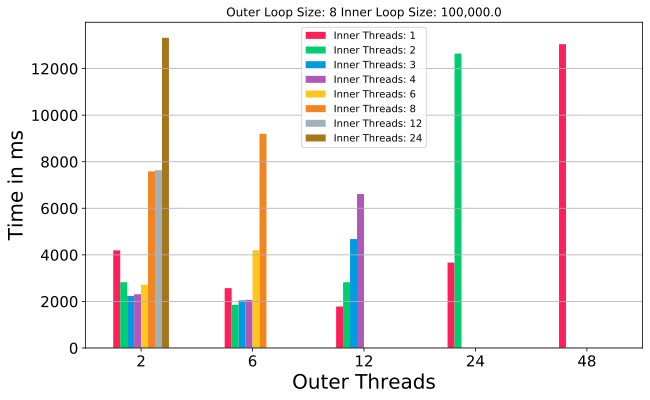

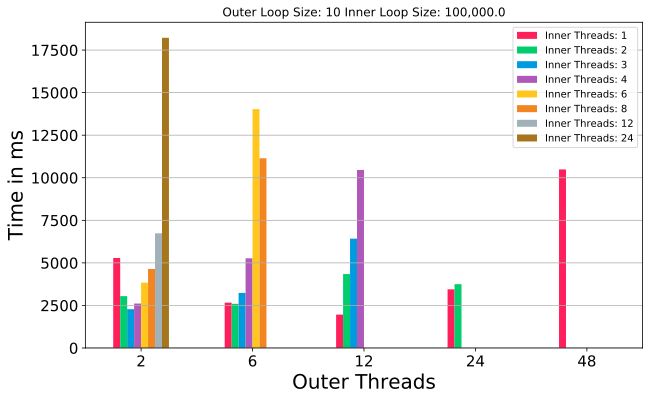

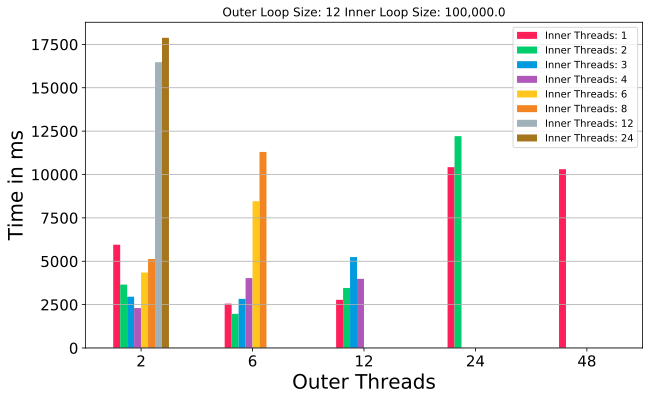

In [45]:
res = pd.read_csv("Results/Log.csv")
res = res.groupby(["OuterLoopSize", "InnerLoopSize", "LastLoopSize", "OuterThreads", "InnerThreads"]).mean().reset_index()
pdf = matplotlib.backends.backend_pdf.PdfPages("figures/nested_openmp_performance_on_cascade_lake.pdf")
for ols,ols_data in res[res["OuterLoopSize"] >= 0].reset_index().groupby("OuterLoopSize"):
    fig, ax1 = plt.subplots( nrows=1, ncols=1 )
    fd = ols_data.pivot(index='OuterThreads', columns="InnerThreads", values=["Time"])
    ax2 = fd.plot(kind="bar", ax=ax1, color=color_list4, rot=0, legend=True, figsize=(10,6), fontsize=15)
    ax2.set_xlabel("Outer Threads", fontsize = 20)
    ax2.set_ylabel("Time in ms", fontsize = 20)
    legend_text = []
    for th,th_data in ols_data.groupby("InnerThreads"):
        legend_text.append("Inner Threads: " + str(th))
    ax2.legend(legend_text)
    ax2.set_title("Outer Loop Size: " + '{:,}'.format(ols) + " Inner Loop Size: " + '{:,}'.format(ols_data.iloc[0]["InnerLoopSize"]))
    ax2.grid('on', which='major', axis="y")
    ax2.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
    pdf.savefig(bbox_inches='tight')
pdf.close()